# Perform GSEA using GSEAPY  

Following the potocol defined here: https://gseapy.readthedocs.io/en/latest/gseapy_tutorial.html#use-gsea-command-or-gsea


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gp.__version__

'0.9.9'

In [3]:
def run_GSEA_gene(celltype='alpha',
             rnkfile="../dat/figdata/fig2_prom_ttest_res_genelevel.csv",
             glist='../dat/glists/gsea_all.gmt'):
    gene_exp_alpha = pd.read_csv(rnkfile,index_col=1)
    #gene_exp_alpha.head()
    rnk = gene_exp_alpha.loc[(gene_exp_alpha["celltype"]==celltype) & (~gene_exp_alpha["isAmbious"])].sort_values(by='mlog10P')["mlog10P"]

    print(rnk.shape)
    print(rnk.head(1))
    print(rnk.tail(1))

    gs_res_a = gp.prerank(rnk=rnk, # or data='./P53_resampling_data.txt'
                     gene_sets=glist, # enrichr library names or gmt file
                     #set permutation_type to phenotype if samples >=15
                     permutation_num=1000, # reduce number to speed up test
                     outdir=None,  # do not write output to disk
                     no_plot=True, # Skip plotting
                     #weighted_score_type=1,
                     #ascending=False,
                        seed=1000,
                     min_size=1,
                     max_size=5000,
                     processes=8)
                     #format='png')
    return(gs_res_a)


## alpha

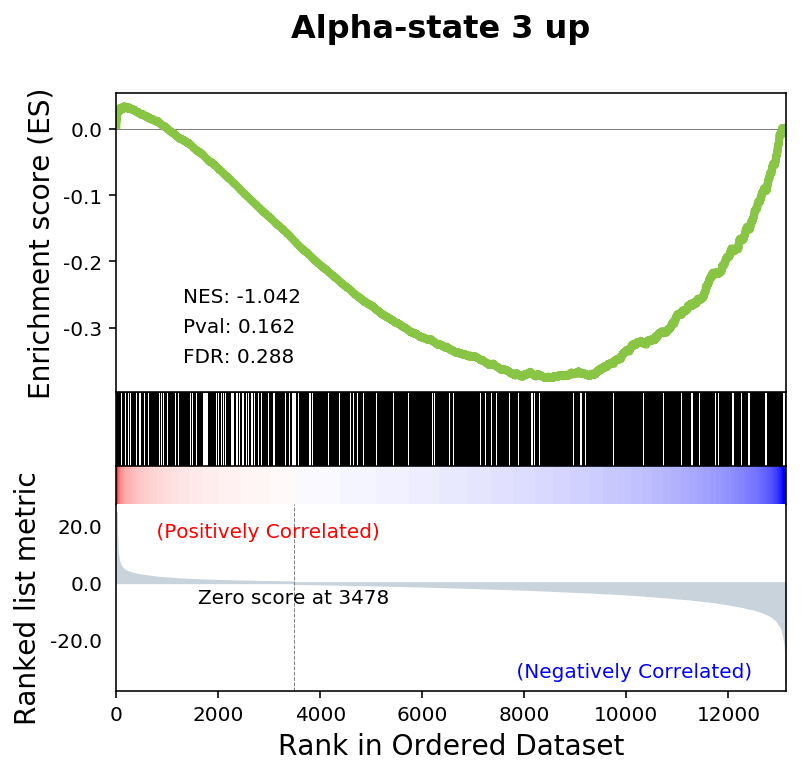

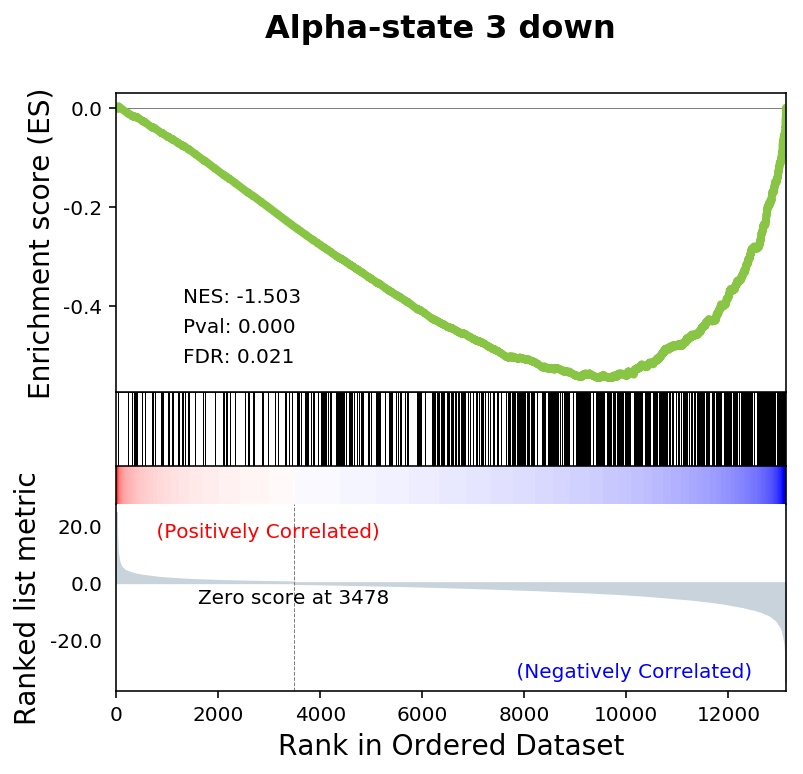

In [13]:
tm='Alpha-state 3 up'
gseaplot(gs_res_a.ranking, term=tm, **gs_res_a.results[tm])
tm='Alpha-state 3 down'
gseaplot(gs_res_a.ranking, term=tm, **gs_res_a.results[tm])

In [7]:
gs_res_a=run_GSEA_gene('alpha')
gs_res_a.res2d.sort_index()

(13130,)
gene
FOSL1   -34.795613
Name: mlog10P, dtype: float64
gene
SPAG16    24.642316
Name: mlog10P, dtype: float64


,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Alpha-state 1 down,-0.448265,-1.246639,0.000000,0.035694,2423,1961,GCG;KCNA5;CERKL;LANCL1;TTC14;ARRDC3;EMB;PDZK1;...,ACTR3C;KIAA0355;CPSF3;C6orf120;ZFP62;ARMC1;PIK...
Alpha-state 1 down<-10,-0.548695,-1.396415,0.013092,0.026179,61,49,RPS26;RPL15;EEF1A1;HNRNPC;APOH;RPL21;RPS27A;CY...,RPL23A;SCG5;SERINC1;HMGB1;TMEM59;VAPA;BCLAF1;H...
Alpha-state 1 down<-5,-0.472570,-1.296847,0.000000,0.028871,828,661,GCG;TTC14;ARRDC3;EMB;ECHDC1;FAM188A;KLHL3;KCNJ...,KLHDC2;ANKRD13A;IARS2;ABT1;TMEM59;PAXBP1;PDIA3...
Alpha-state 1 up,-0.466623,-1.301042,0.000000,0.029735,4578,3696,TTR;SND1;FEV;NEUROD1;EPHX1;NDRG1;PTPN6;NUPR1L;...,CKS1B;DGCR8;PGPEP1;TMEM163;LRPAP1;HNRNPA0;GCAT...
Alpha-state 1 up>10,-0.437299,-1.210246,0.000000,0.045411,1457,1186,TTR;FEV;EPHX1;NDRG1;NUPR1L;CHGA;ANXA6;REC8;AUP...,CD320;PMM1;RGL2;RPL27;RPL36;PUF60;MAFB;TM7SF3;...
Alpha-state 1 up>5,-0.464904,-1.295203,0.000000,0.027385,3807,3106,TTR;SND1;FEV;NEUROD1;EPHX1;NDRG1;PTPN6;NUPR1L;...,MGST3;R3HDM4;CD63;CHFR;L1CAM;TNRC18;SNRPD2;TME...
Alpha-state 2 down,-0.478261,-1.329371,0.000000,0.026912,1781,1434,TTR;SND1;FEV;EPHX1;NUPR1L;CHGA;SH3TC1;ANXA6;RE...,ZNF414;EGR4;RPL35;PLBD2;RBM27;COX5B;IDH2;C20or...
Alpha-state 2 down<-10,-0.451581,-1.200842,0.055000,0.047648,170,136,FEV;CHGA;LGALS3BP;RPS26;F10;PCSK1N;CHCHD2;TMEM...,ARF1;PFN1;CTSD;HMGN2;TMEM66;RPS2;HLA-C;CYC1;ST...
Alpha-state 2 down<-5,-0.458042,-1.262197,0.000000,0.031901,857,678,TTR;FEV;EPHX1;NUPR1L;CHGA;ANXA6;AUP1;LGALS3BP;...,ISCA2;NPC2;SYT5;GIPC1;PRDX5;C19orf43;ETNK2;GDI...


## beta

In [14]:
gs_res=run_GSEA_gene('beta')
gs_res.res2d.sort_index()

(12988,)
gene
SLC2A13   -40.521506
Name: mlog10P, dtype: float64
gene
INS-IGF2    36.40042
Name: mlog10P, dtype: float64


,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Alpha-state 1 down,-0.427283,-1.460995,0.000000,0.009524,2423,1949,GPD1L;CRADD;KCNA5;CCDC150;SLC38A4;PRKAB1;PLCL2...,TBPL1;TMEM167B;AGPAT5;ATRN;ZNF781;DNAJC25;TMEM...
Alpha-state 1 down<-10,-0.590123,-1.715466,0.000000,0.001083,61,48,EEF1A1;RPS26;GC;FOS;PTP4A1;YWHAQ;RPL21;RAB1A;N...,TMEM66;HSP90AA1;RPL9;H3F3A;HNRNPA1;TMEM59;FOSB...
Alpha-state 1 down<-5,-0.453794,-1.535945,0.000000,0.007241,828,663,GPD1L;GPR27;EMB;FABP5;NHLRC3;TMEM5;TTC14;TCF20...,C22orf39;TCAIM;EIF1AX;RPL7;GCH1;FH;SUB1;PAK2;P...
Alpha-state 1 up,-0.393280,-1.349153,0.000000,0.019915,4578,3639,INS;NPEPL1;G6PC2;DHRS2;IPO13;KCNK17;KLHDC4;MS4...,MRPS28;CINP;RPL37;SLC27A1;HMBS;PIGV;UBAC1;PYGB...
Alpha-state 1 up>10,-0.409621,-1.392318,0.000000,0.014778,1457,1174,INS;KCNK16;ABLIM2;CHGA;ATP1A1;REC8;PCSK1N;SYT1...,GSK3A;MZF1;IFI27L1;B3GNT1;CDK4;MRPL28;RBM42;C1...
Alpha-state 1 up>5,-0.394016,-1.351553,0.000000,0.019858,3807,3055,INS;NPEPL1;G6PC2;DHRS2;IPO13;KCNK17;KCNK16;ETF...,HMBS;PIGV;UBAC1;PYGB;GSK3A;ADCY6;SEPW1;SLC50A1...
Alpha-state 2 down,-0.428932,-1.461195,0.000000,0.009783,1781,1436,INS;KLHDC4;KCNK16;CHGA;ATP1A1;WWC1;REC8;PCSK1N...,C17orf70;ATP5D;RAB7A;NT5C;ACADS;TUBGCP2;ZNF511...
Alpha-state 2 down<-10,-0.467624,-1.491781,0.001009,0.008018,170,132,CHGA;PCSK1N;LGALS3BP;CRYBA2;CST3;CD99;RPS26;GC...,RPS7;TMEM160;CFL1;ATP6AP1;PSAP;RAB1B;TUBB4B;CL...
Alpha-state 2 down<-5,-0.443755,-1.497586,0.000000,0.008090,857,678,CHGA;ATP1A1;PCSK1N;RBP1;GSTM2;RPL3;NUPR1L;CRIP...,CDK4;MRPL28;RBM42;C19orf70;RPS16;SUPT5H;C19orf...


In [24]:
gs_res_a.res2d.shape

(66, 8)

In [21]:
gs_res_a.res2d[(gs_res_a.res2d['pval']<0.01)].shape

(46, 8)

In [25]:
gs_res_a.res2d[(gs_res_a.res2d['pval']<0.1) & (gs_res_a.res2d['es']>0)]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Alpha1,1.000000,4.525805,0.0,0.0,179,68,SPAG16;GCG;TTR;TMEM72;SEMA6A;SND1;C1orf168;KCN...,SPAG16;GCG;TTR;TMEM72;SEMA6A;SND1;C1orf168;KCN...
Beta1,0.818461,4.260141,0.0,0.0,178,87,SPAG16;C1orf168;KCNA5;NEUROD1;CERKL;EPHX1;MYBP...,SPAG16;C1orf168;KCNA5;NEUROD1;CERKL;EPHX1;MYBP...


In [23]:
gs_res.res2d[(gs_res.res2d['pval']<0.1) & (gs_res.res2d['es']>0)]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
Alpha1,0.837166,3.758180,0.000000,0.000000,179,68,DHRS2;ETFDH;MYBPHL;KCNA5;ARHGEF40;TMEM130;CCDC...,DHRS2;ETFDH;MYBPHL;KCNA5;ARHGEF40;TMEM130;CCDC...
Beta1,1.000000,4.501983,0.000000,0.000000,178,89,INS-IGF2;INS;CASR;NPEPL1;G6PC2;DHRS2;ID1;XIRP2...,INS-IGF2;INS;CASR;NPEPL1;G6PC2;DHRS2;ID1;XIRP2...
Beta sub3_xin,0.780771,2.084773,0.000000,0.001461,13,8,INS;CHGA;ASB9;DLK1;CPE;TIMP1;CKB;CHGB,INS;CHGA;ASB9;DLK1
Beta sub2_xin,0.548305,1.753645,0.022059,0.026297,28,17,ID1;RBP1;RGS16;GPX3;FOS;NPY;RASD1;JUNB;ID3;NEN...,ID1;RBP1;RGS16


## delta

gs_res_d=run_GSEA_gene('delta')
gs_res_d.res2d.sort_index()

### Save results

In [6]:
gs_res.res2d[['es','nes','pval','fdr','geneset_size','matched_size']].to_csv('../dat/figdata/GSEA_beta_all_seed1000_p1000.csv')
gs_res_a.res2d[['es','nes','pval','fdr','geneset_size','matched_size']].to_csv('../dat/figdata/GSEA_alpha_all_seed1000_p1000.csv')
#gs_res_d.res2d[['es','nes','pval','fdr','geneset_size','matched_size']].to_csv('../dat/figdata/GSEA_delta_all_seed1000_p10000.csv')

from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index 
for i in range(len(terms)):
    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],ofname=terms[i]+'_beta_all_seed1000_p10000.pdf')
terms = gs_res_a.res2d.index 
for i in range(len(terms)):
    gseaplot(gs_res_a.ranking, term=terms[i], **gs_res_a.results[terms[i]],ofname=terms[i]+'_all_seed1000_p10000.pdf')
#terms = gs_res_d.res2d.index 
#for i in range(len(terms)):
#    gseaplot(gs_res_d.ranking, term=terms[i], **gs_res_a.results[terms[i]],ofname=terms[i]+'_delta_all_seed1000_p10000.pdf')    